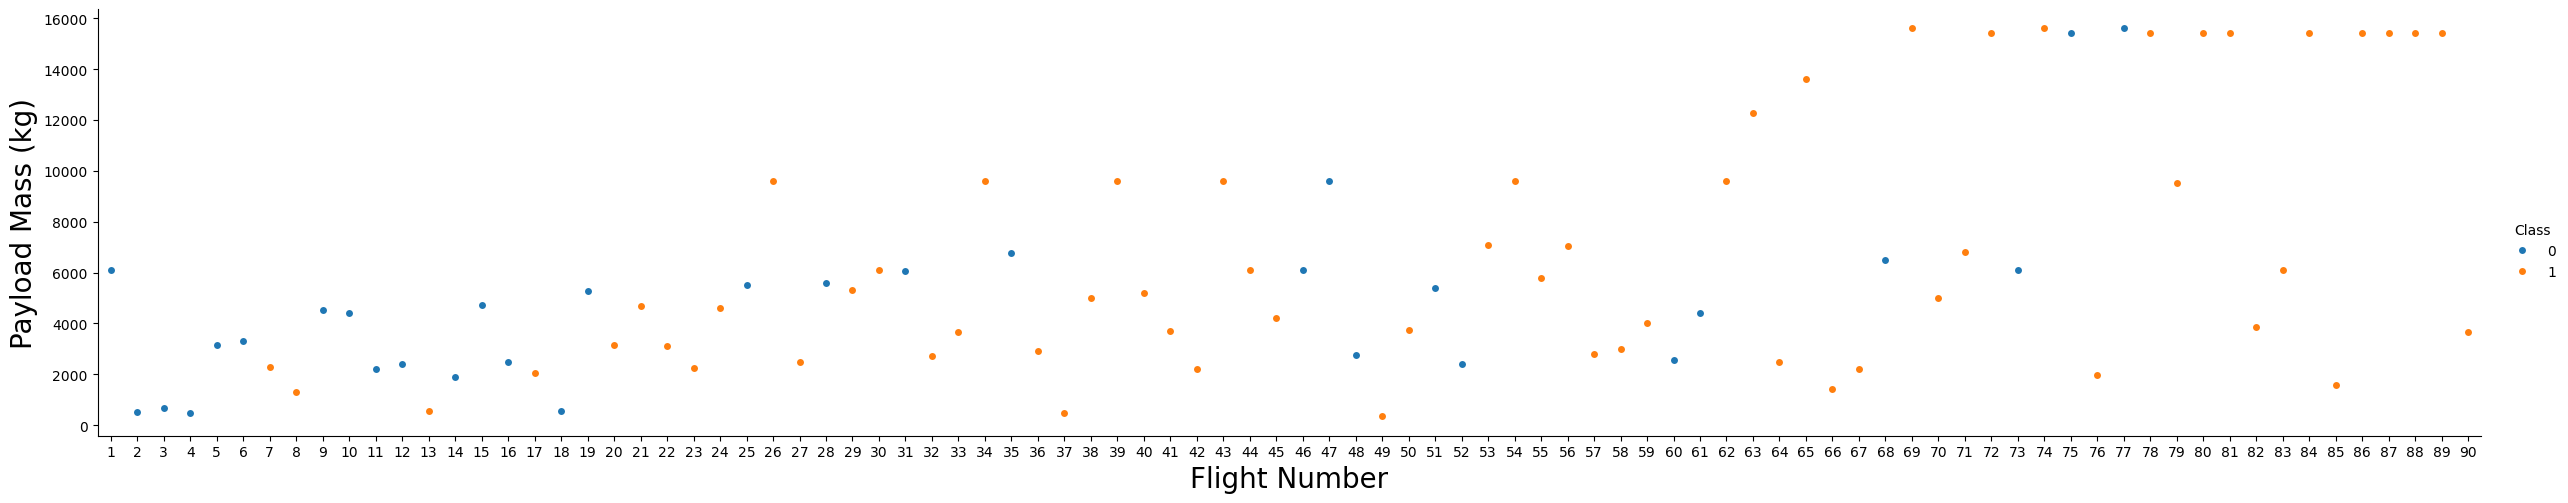

In [4]:
#Import Libraries
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data

from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(dataset_part_2_csv)
df.head(5)

#Exploratory Data Analysis
#Initial Visualization
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

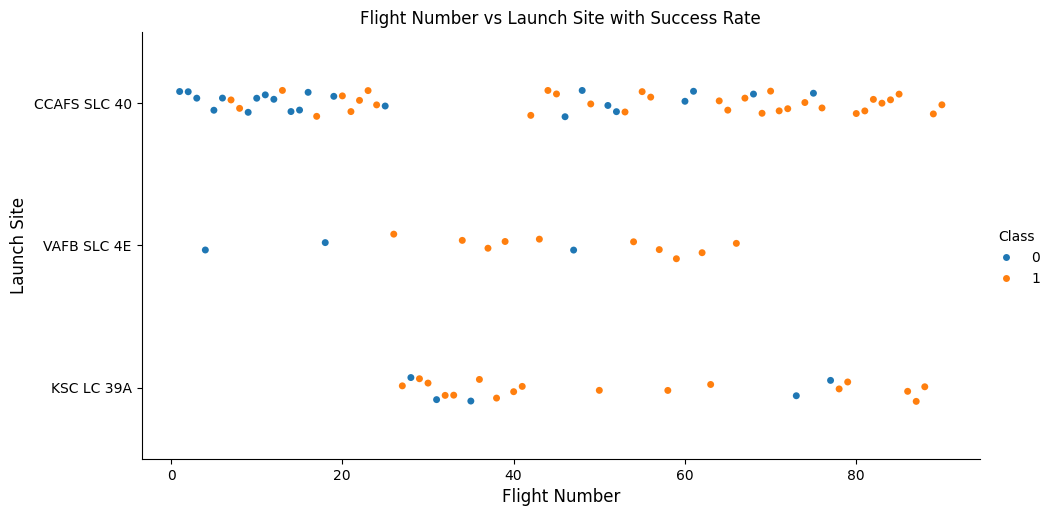

In [5]:
#Task 1: Flight Number vs Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Flight Number vs Launch Site with Success Rate")
plt.show()

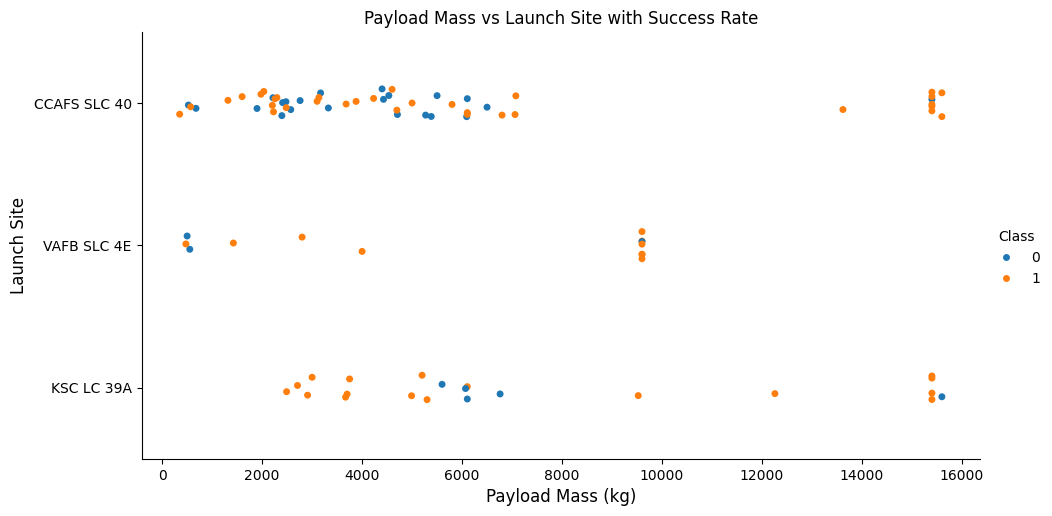

In [6]:
#Task 2: Payload Mass vs Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Payload Mass vs Launch Site with Success Rate")
plt.show()

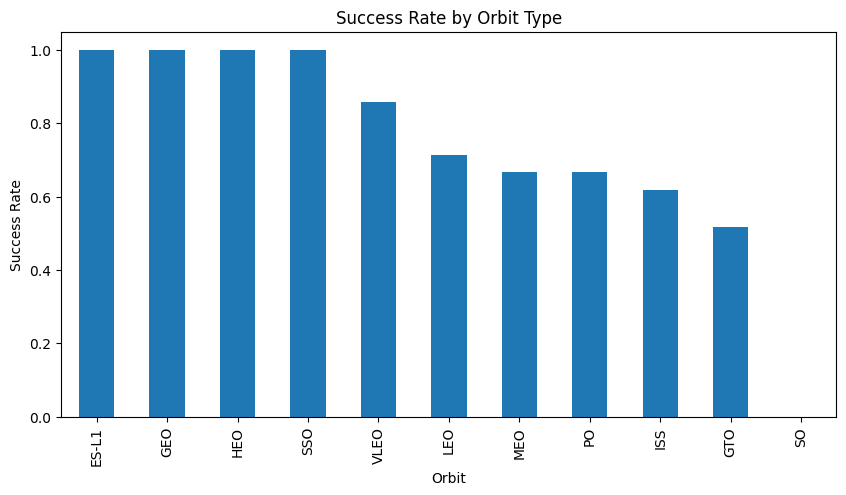

In [7]:
#Task 3: Success Rate by Orbit Type
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
orbit_success.plot(kind='bar', figsize=(10,5))
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit Type")
plt.show()

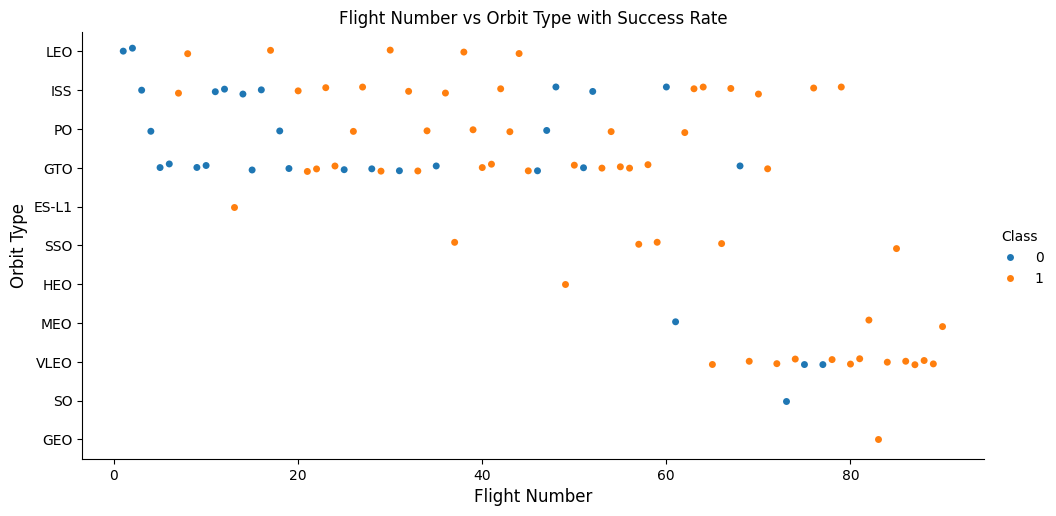

In [8]:
#Task 4: FlightNumber vs Orbit Type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Flight Number vs Orbit Type with Success Rate")
plt.show()

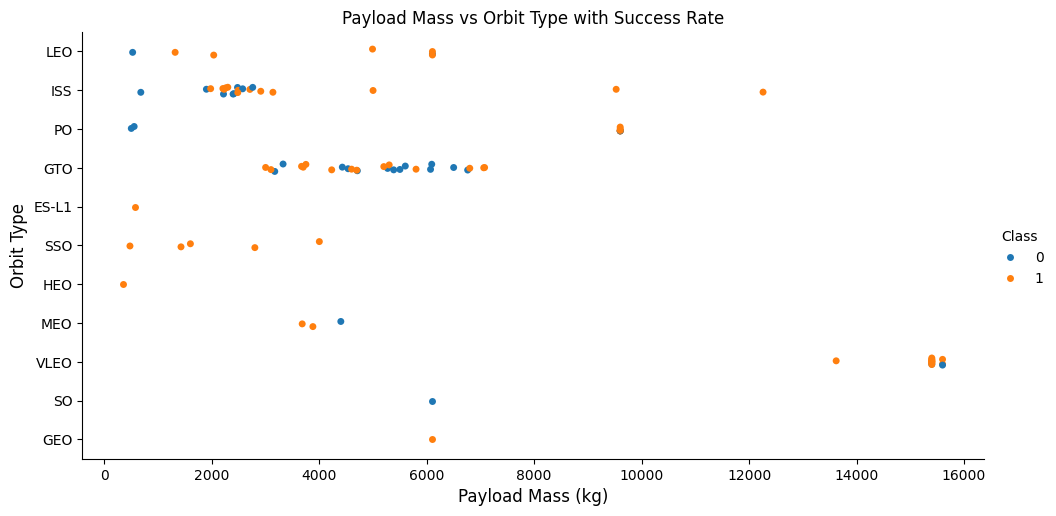

In [9]:
#Task 5: Payload Mass vs Orbit Type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Payload Mass vs Orbit Type with Success Rate")
plt.show()

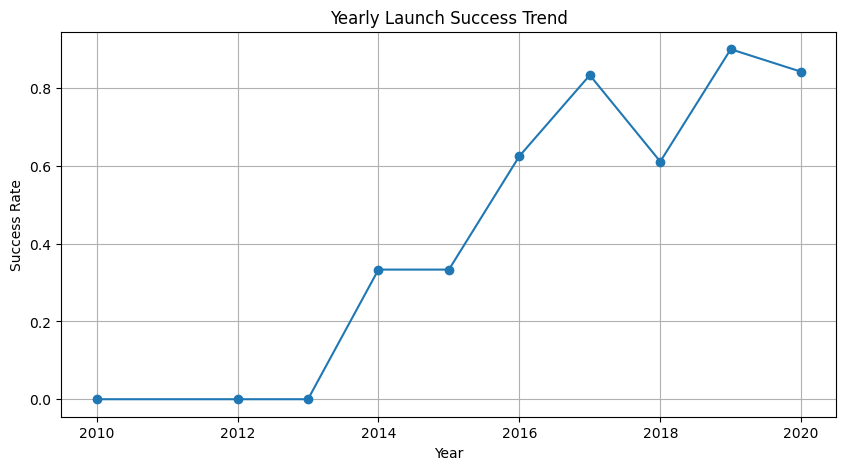

In [10]:
#Task 6: Yearly Success Trend
# Extract year from date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate yearly success rate
yearly_success = df.groupby('Year')['Class'].mean()

# Plot
yearly_success.plot(kind='line', figsize=(10,5), marker='o')
plt.ylabel("Success Rate")
plt.title("Yearly Launch Success Trend")
plt.grid()
plt.show()

In [11]:
#Feature Engineering
#Select Features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
#Task 7: Create Dummy Variables
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Task 8: Cast to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [14]:
#Export Data
features_one_hot.to_csv('dataset_part_3.csv', index=False)